In [1]:
%matplotlib inline

In [6]:
# fit a second degree polynomial to the sensitivity data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd

def visualizeandplot(x,y,x_line,y_line,i):     
        # Visualizing the Polymonial Regression results
        pyplot.rcParams["figure.figsize"] = (16,9)
        pyplot.scatter(x, y, color='red')
        pyplot.plot(x_line, y_line, color='blue')
        pyplot.title('Sequence ' +i+' Polynomial fit')
        pyplot.xlabel('Section number')
        pyplot.ylabel('scalar')
        pyplot.ylim(0,4)
        namefig='test'+str(i)+'.png'
        pyplot.savefig(namefig)
        pyplot.show()
        cols=['SECTION','SCALAR_POLY']
        out=pd.DataFrame(x_line)
        out['1']=y_line
        out.columns=cols
        csvout_name=str(i)+'scalars.csv'
        out.to_csv(csvout_name, index=False)
        return
    
# funtion to get dataframes processed
def takein(i):
        seqname=i+'_Z_amp_allCab.csv'
        df = read_csv(seqname)
        dfcopy=df.copy()
        df=df.loc[(df['CABLE'] == 13) | (df['CABLE'] == 15)]
        dfcopy=dfcopy.loc[(dfcopy['CABLE'] == 14)]
        df=df.groupby(['CABTR']).mean()
        df=df.loc[(df['CABLE'] == 14)]
        data = df.values
        data2 = dfcopy.values
        # extract the datasets
        x, y1 = data[:, -1], data[:, -2]
        y2 = data2[:, -2]
        # get the ratio
        y=y1/y2
        return x,y
    
# define the POL function
def POL(x, a, b, c, d , e , f):
    return a * x + b * x**2 + c * x**3 + d * x**4 + e * x**5 + f

# fit the curve
def dataload(xx):
    for i in xx:
        x,y =takein(i)
        popt, _ = curve_fit(POL, x, y)
        a, b, c, d ,e, f  = popt
        print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f * x^5 + %.5f' % (a, b, c, d, e, f))
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = arange(min(x), max(x+1), 1)
        # calculate the output for the range
        y_line = POL(x_line, a, b, c, d, e, f )
        # create a line plot for the mapping function
        visualizeandplot(x,y,x_line,y_line,i)
    return        


y = 0.13437 * x + -0.00816 * x^2 + 0.00020 * x^3 + -0.00000 * x^4 + -0.00000 * x^5 + 0.78614


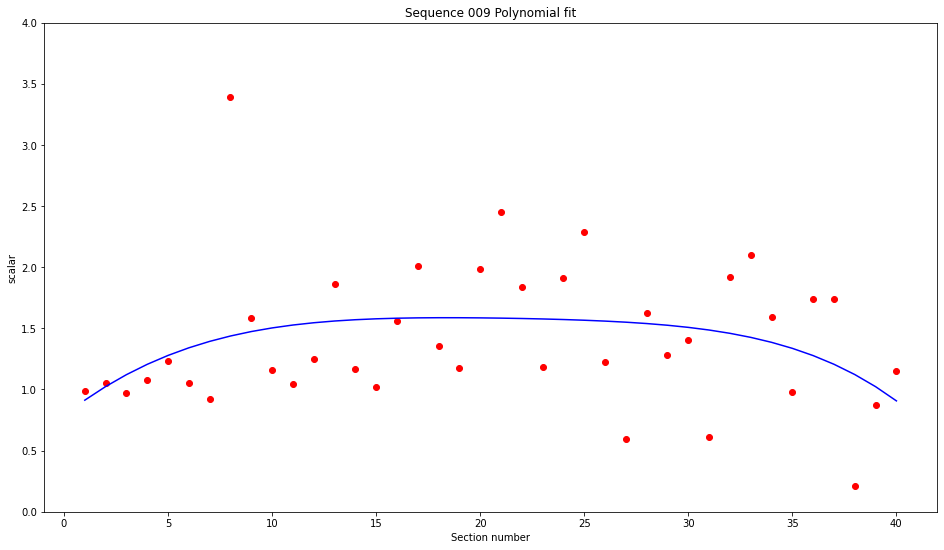

y = -0.09494 * x + 0.02007 * x^2 + -0.00136 * x^3 + 0.00004 * x^4 + -0.00000 * x^5 + 1.17031


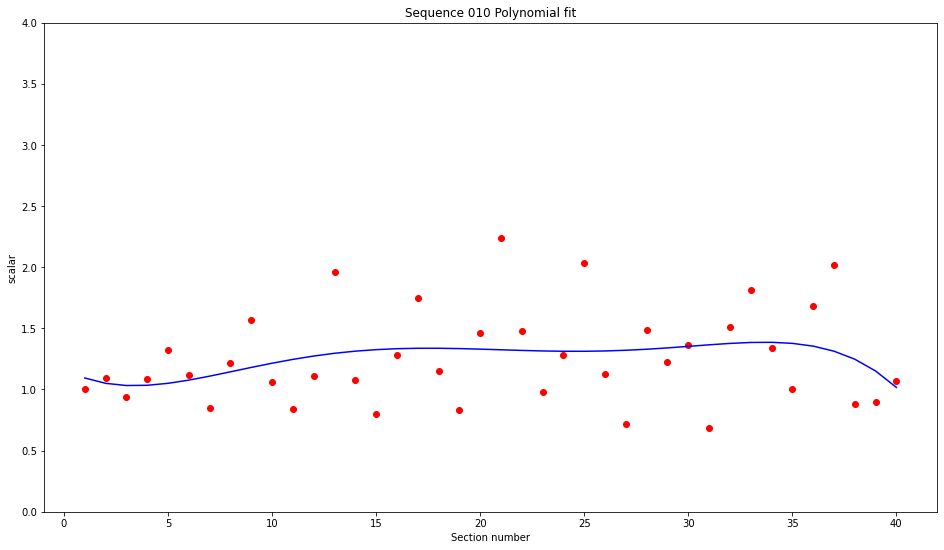

y = -0.00061 * x + 0.00116 * x^2 + 0.00007 * x^3 + -0.00000 * x^4 + 0.00000 * x^5 + 1.11654


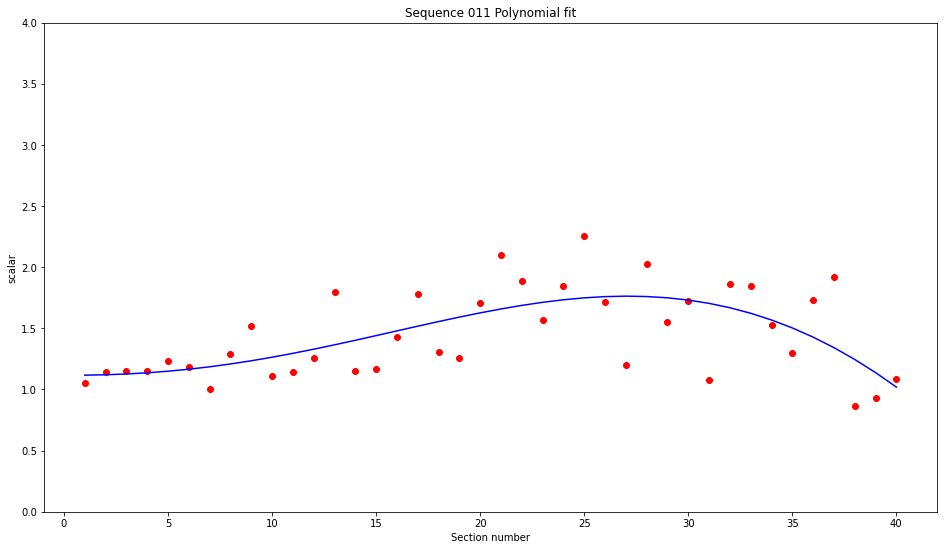

y = 0.00872 * x + 0.00077 * x^2 + 0.00009 * x^3 + -0.00001 * x^4 + 0.00000 * x^5 + 1.12832


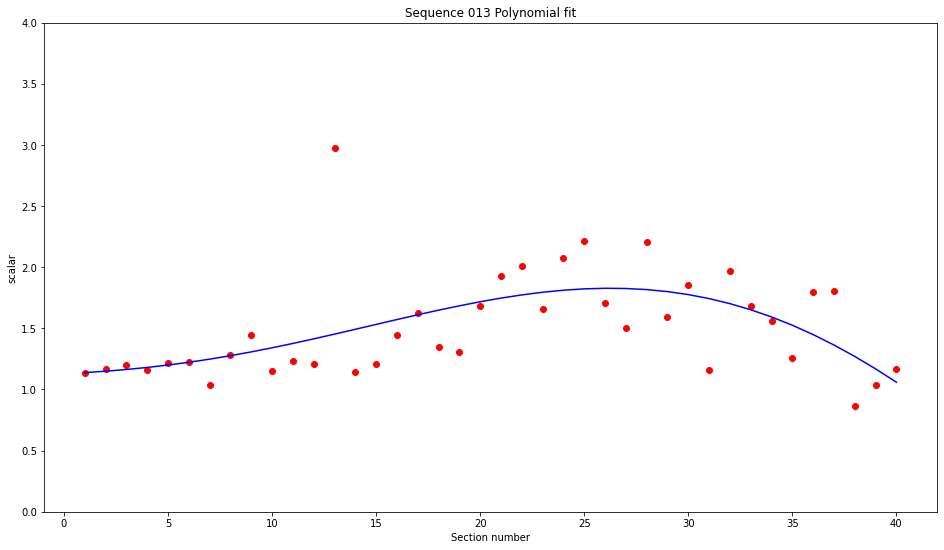

y = 0.00680 * x + 0.00092 * x^2 + 0.00002 * x^3 + 0.00000 * x^4 + -0.00000 * x^5 + 1.13356


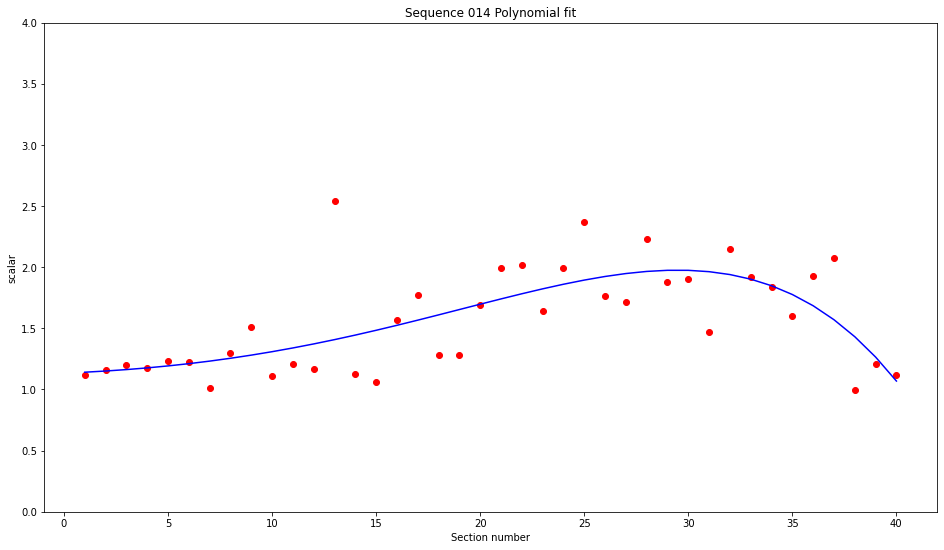

In [7]:
sequences=['009','010','011','013','014']
dataload(sequences)